In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.signal import butter,filtfilt,welch
import os
from mne.time_frequency import psd_array_multitaper


In [2]:

def read_signals(folder_path):
    signals = []
    file_names = []
    for file_name in sorted(os.listdir(folder_path)):  # Ordenar los archivos por nombre
        if file_name.endswith(".txt"):  # Filtrar solo archivos de texto
            file_path = os.path.join(folder_path, file_name)
            signal = np.loadtxt(file_path)  # Leer los datos del archivo
            signals.append(signal)
            file_names.append(file_name)  # Guardar el nombre del archivo
    
    return signals, file_names

# Ejemplo de uso con la carpeta 'Datos_reales/P'
signals_P, file_names_P = read_signals('Datos_reales/P')
signals_F, file_names_F = read_signals('Datos_reales/F')
signals_C, file_names_C = read_signals('Datos_reales/C')
signals_O, file_names_O = read_signals('Datos_reales/O')
signals_T, file_names_T = read_signals('Datos_reales/T')


# Mostrar nombres de los archivos leídos
print("Archivos en P:", len(signals_F))
print("Archivos en F:", file_names_F)


Archivos en P: 7
Archivos en F: ['F3_MNE.txt', 'F4_MNE.txt', 'F7_MNE.txt', 'F8_MNE.txt', 'Fp1_MNE.txt', 'Fp2_MNE.txt', 'Fz_MNE.txt']


16


NameError: name 'standardized_signals_P_z_score' is not defined

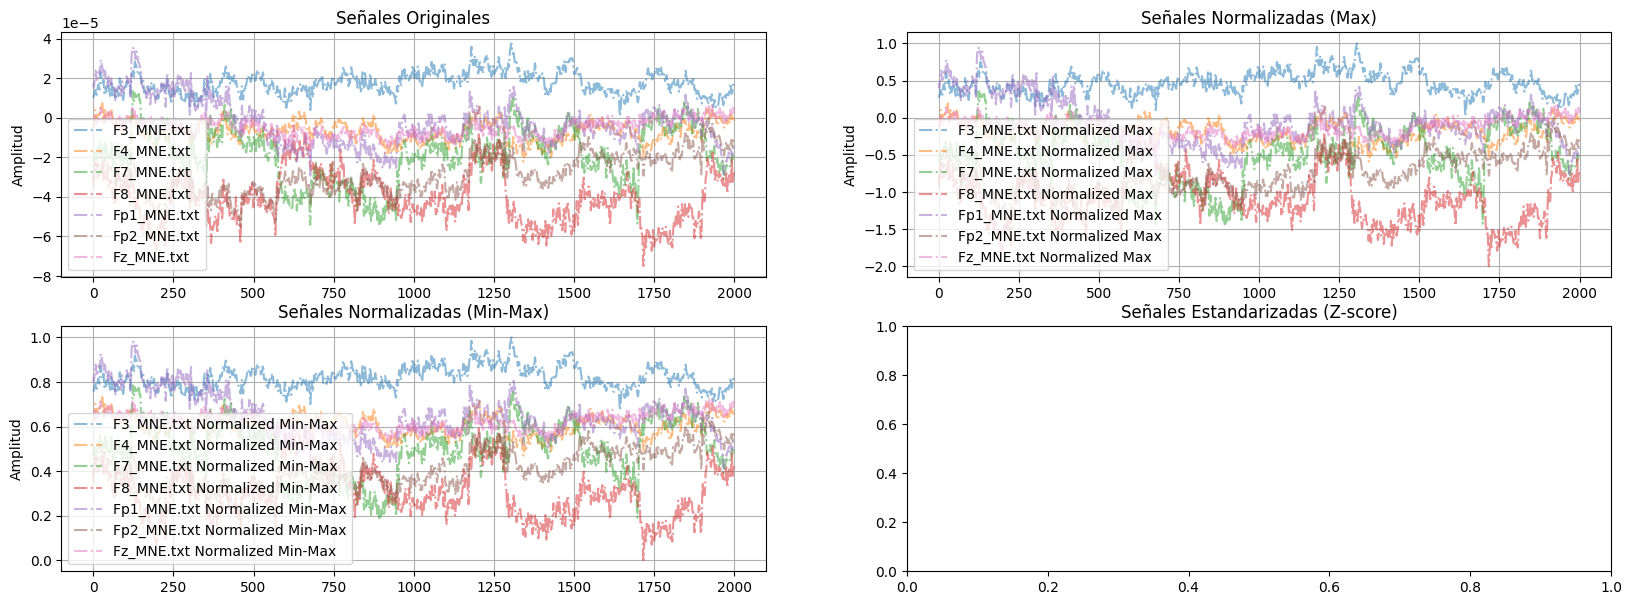

In [3]:

def normalize_max(signal,global_max):
    return signal /abs(global_max)

def normalize_min_max(signal, global_min, global_max):
    return (signal - global_min) / (global_max - global_min)

def standardize_z_score(signal, global_mean, global_std):
    return (signal - global_mean) / global_std

# Función para graficar señales
def plot_signal(ax, signal_data, label):
    ax.plot(signal_data, label=label,alpha=0.5,linestyle="-.")



all_signals=np.concatenate([signals_P,signals_F,signals_O,signals_T,signals_C])
print(len(all_signals))


all_values = np.concatenate(all_signals)  # Combinar todos los datos
global_min = np.min(all_values)
global_max = np.max(all_values)
global_mean = np.mean(all_values)
global_std = np.std(all_values)


normalized_signals_P_max = [normalize_max(signal,global_max) for signal in signals_P]
normalized_signals_P_min_max = [normalize_min_max(signal, global_min, global_max) for signal in signals_P]
normalized_signals_P_z_score = [standardize_z_score(signal, global_mean, global_std) for signal in signals_P]

normalized_signals_T_max = [normalize_max(signal,global_max) for signal in signals_T]
normalized_signals_T_min_max = [normalize_min_max(signal, global_min, global_max) for signal in signals_T]
normalized_signals_T_z_score= [standardize_z_score(signal, global_mean, global_std) for signal in signals_T]

normalized_signals_O_max = [normalize_max(signal,global_max) for signal in signals_O]
normalized_signals_O_min_max = [normalize_min_max(signal, global_min, global_max) for signal in signals_O]
normalized_signals_O_z_score= [standardize_z_score(signal, global_mean, global_std) for signal in signals_O]

normalized_signals_F_max = [normalize_max(signal,global_max) for signal in signals_F]
normalized_signals_F_min_max = [normalize_min_max(signal, global_min, global_max) for signal in signals_F]
normalized_signals_F_z_score= [standardize_z_score(signal, global_mean, global_std) for signal in signals_F]

normalized_signals_C_max = [normalize_max(signal,global_max) for signal in signals_C]
normalized_signals_C_min_max = [normalize_min_max(signal, global_min, global_max) for signal in signals_C]
normalized_signals_C_z_score= [standardize_z_score(signal, global_mean, global_std) for signal in signals_C]


# Crear un gráfico con múltiples ejes
fig, axs = plt.subplots(2, 2, figsize=(20, 7))  # Cambiar a 2x2

# Graficar señales originales
axs[0, 0].set_title('Señales Originales')
# for i, signal in enumerate(signals_P):
#     plot_signal(axs[0, 0], signal, file_names_P[i])
#     axs[0, 0].set_ylabel('Amplitud')
#     axs[0, 0].grid()
#     axs[0, 0].legend()
# for i, signal in enumerate(signals_T):
#     plot_signal(axs[0, 0], signal, file_names_T[i])
#     axs[0, 0].set_ylabel('Amplitud')
#     axs[0, 0].grid()
#     axs[0, 0].legend()
# for i, signal in enumerate(signals_O):
#     plot_signal(axs[0, 0], signal, file_names_O[i])
#     axs[0, 0].set_ylabel('Amplitud')
#     axs[0, 0].grid()
#     axs[0, 0].legend()
for i, signal in enumerate(signals_F):
    plot_signal(axs[0, 0], signal, file_names_F[i])
    axs[0, 0].set_ylabel('Amplitud')
    axs[0, 0].grid()
    axs[0, 0].legend()

    # Graficar señales normalizadas (Max)
axs[0, 1].set_title('Señales Normalizadas (Max)')
# for i, signal in enumerate(normalized_signals_P_max):
#     plot_signal(axs[0, 1], signal, f'{file_names_P[i]} Normalized Max')
#     axs[0, 1].set_ylabel('Amplitud')
#     axs[0, 1].grid()
#     axs[0, 1].legend()
# for i, signal in enumerate(normalized_signals_T_max):
#     plot_signal(axs[0, 1], signal, f'{file_names_T[i]} Normalized Max')
#     axs[0, 1].set_ylabel('Amplitud')
#     axs[0, 1].grid()
#     axs[0, 1].legend()
# for i, signal in enumerate(normalized_signals_O_max):
#     plot_signal(axs[0, 1], signal, f'{file_names_O[i]} Normalized Max')
#     axs[0, 1].set_ylabel('Amplitud')
#     axs[0, 1].grid()
#     axs[0, 1].legend()
for i, signal in enumerate(normalized_signals_F_max):
    plot_signal(axs[0, 1], signal, f'{file_names_F[i]} Normalized Max')
    axs[0, 1].set_ylabel('Amplitud')
    axs[0, 1].grid()
    axs[0, 1].legend()

# Graficar señales normalizadas (Min-Max)
axs[1, 0].set_title('Señales Normalizadas (Min-Max)')
# for i, signal in enumerate(normalized_signals_P_min_max):
#     plot_signal(axs[1, 0], signal, f'{file_names_P[i]} Normalized Min-Max')
#     axs[1, 0].set_ylabel('Amplitud')
#     axs[1, 0].grid()
#     axs[1, 0].legend()
# for i, signal in enumerate(normalized_signals_T_min_max):
#     plot_signal(axs[1, 0], signal, f'{file_names_T[i]} Normalized Min-Max')
#     axs[1, 0].set_ylabel('Amplitud')
#     axs[1, 0].grid()
#     axs[1, 0].legend()
# for i, signal in enumerate(normalized_signals_O_min_max):
#     plot_signal(axs[1, 0], signal, f'{file_names_O[i]} Normalized Min-Max')
#     axs[1, 0].set_ylabel('Amplitud')
#     axs[1, 0].grid()
#     axs[1, 0].legend()
for i, signal in enumerate(normalized_signals_F_min_max):
    plot_signal(axs[1, 0], signal, f'{file_names_F[i]} Normalized Min-Max')
    axs[1, 0].set_ylabel('Amplitud')
    axs[1, 0].grid()
    axs[1, 0].legend()

    # Graficar señales estandarizadas (Z-score)
axs[1, 1].set_title('Señales Estandarizadas (Z-score)')
for i, signal in enumerate(standardized_signals_P_z_score):
    plot_signal(axs[1, 1], signal, f'Signal P{i + 1} Standardized Z-score')
    axs[1, 1].set_ylabel('Amplitud')
    axs[1, 1].grid()
    axs[1, 1].legend()
for i, signal in enumerate(standardized_signals_T_z_score):
    plot_signal(axs[1, 1], signal, f'Signal F{i + 1} Standardized Z-score')
    axs[1, 1].set_ylabel('Amplitud')
    axs[1, 1].grid()
    axs[1, 1].legend()
for i, signal in enumerate(standardized_signals_O_z_score):
    plot_signal(axs[1, 1], signal, f'Signal F{i + 1} Standardized Z-score')
    axs[1, 1].set_ylabel('Amplitud')
    axs[1, 1].grid()
    axs[1, 1].legend()
for i, signal in enumerate(standardized_signals_F_z_score):
    plot_signal(axs[1, 1], signal, f'Signal F{i + 1} Standardized Z-score')
    axs[1, 1].set_ylabel('Amplitud')
    axs[1, 1].grid()
    axs[1, 1].legend()


# Configurar el gráfico
plt.xlabel('Muestras')
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()



    Using multitaper spectrum estimation with 7 DPSS windows
1001
    Using multitaper spectrum estimation with 7 DPSS windows


1001
    Using multitaper spectrum estimation with 7 DPSS windows
1001
    Using multitaper spectrum estimation with 7 DPSS windows
1001
    Using multitaper spectrum estimation with 7 DPSS windows
1001
    Using multitaper spectrum estimation with 7 DPSS windows
1001
    Using multitaper spectrum estimation with 7 DPSS windows
1001


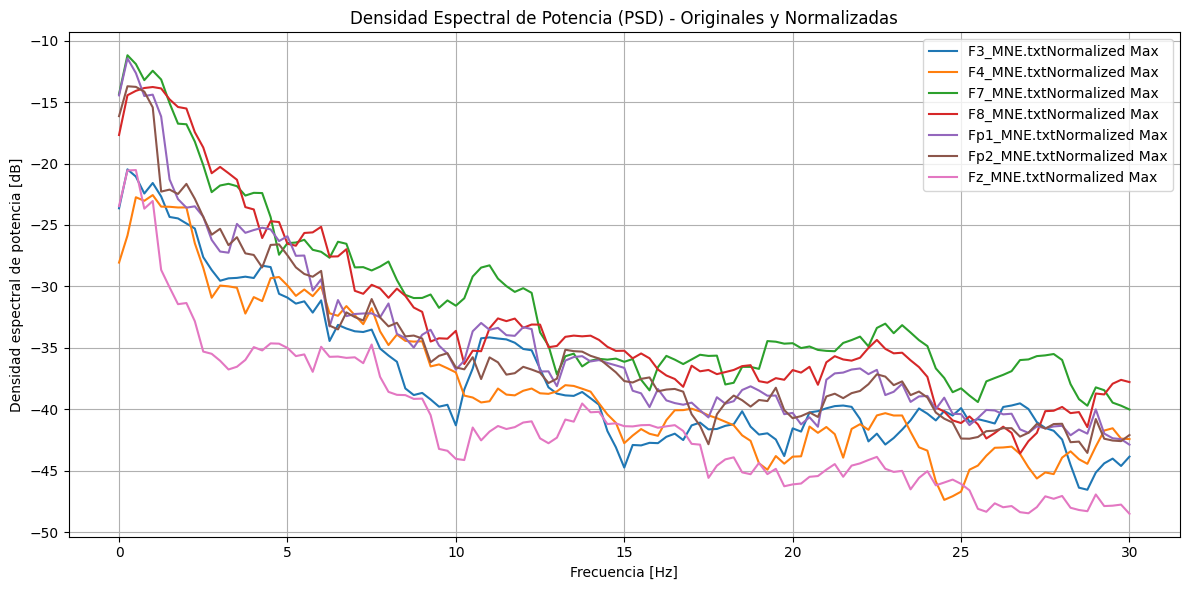

In [ ]:
# Función para calcular y graficar la PSD
def plot_psd(signal_data, fs, label, linestyle="-"):
    psd,frequencies = psd_array_multitaper(signal_data, fs, fmin=0, fmax=fs / 2, adaptive=True, normalization='full')
    print(len(frequencies))
    idx = frequencies <= 30  # Solo mostrar frecuencias hasta 40 Hz
    plt.plot(frequencies[idx], 10*np.log10(psd[idx]), linestyle, label=label)

# Graficar la Transformada de Fourier para señales normalizadas y originales

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)

# Graficar PSD de señales originales
# for i, signala in enumerate(signals_F):
#     plot_psd(signala, 500, f'{file_names_F[i]}Original', '-')
# for i, signala in enumerate(signals_T):
#         plot_psd(signala, 500, f'{file_names_T[i]}Original', '.')
# for i, signala in enumerate(signals_O):
#     plot_psd(signala, 500, f'{file_names_O[i]}Original', '--')
# for i, signala in enumerate(signals_P):
#     plot_psd(signala, 500, f'{file_names_P[i]}Original', '-.')
# for i, signala in enumerate(signals_C):
#     plot_psd(signala, 500, f'{file_names_C[i]}Original', '-.')

#Graficar PSD de señales normalizadas (Max)
for i, signal in enumerate(normalized_signals_F_max):
   plot_psd(signal, 500, f'{file_names_F[i]}Normalized Max','-')
# for i, signal in enumerate(normalized_signals_T_max):
#    plot_psd(signal, 500, f'{file_names_T[i]}Normalized Max','.')
# for i, signal in enumerate(normalized_signals_O_max):
#    plot_psd(signal, 500, f'{file_names_O[i]}Normalized Max','--')
# for i, signal in enumerate(normalized_signals_P_max):
#    plot_psd(signal, 500, f'{file_names_P[i]}Normalized Max','-.')
# for i, signal in enumerate(normalized_signals_P_max):
#    plot_psd(signal, 500, f'{file_names_P[i]}Normalized Max','-.')

# # Graficar PSD de señales normalizadas (Min-Max)
# plot_psd(normalized_signals_min_max_S[0], 500, '"Simulado" 1 ', 'blue', '--')

# for i, signal in enumerate(normalized_signals_min_max):
#     plot_psd(signal, 500, f'Signal {i + 1} Normalized Min-Max', colores[i], '--')

# # Graficar PSD de señales estandarizadas (Z-score)
# plot_psd(standardized_signals_z_score_S[0], 500, '"Simulado" 1 ', 'blue', ':')
# for i, signal in enumerate(standardized_signals_z_score):
#     plot_psd(signal, 500, f'Signal {i + 1} Standardized Z-score', colores[i], ':')

# Configurar el gráfico
plt.title('Densidad Espectral de Potencia (PSD) - Originales y Normalizadas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [dB]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

0.0 23.651743058468586 40.56942090879366 27.344627642786886 35.15219340293661
23.651743058468586 0.0 43.140679305892995 32.22915586406612 29.780422506127106
40.56942090879366 43.140679305892995 0.0 64.73834199757424 66.3801047975404
27.344627642786886 32.22915586406612 64.73834199757424 0.0 19.32383244588198
35.15219340293661 29.780422506127106 66.3801047975404 19.32383244588198 0.0


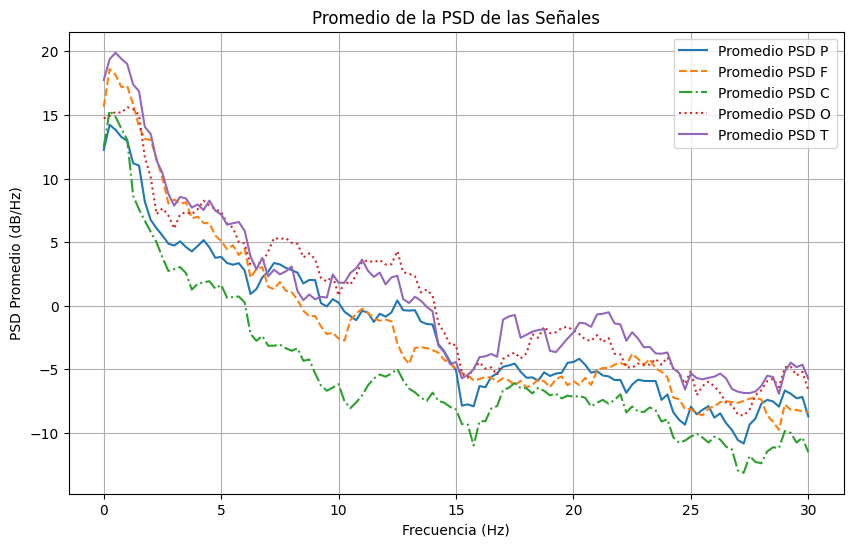

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper

def calcular_promedio_psd(signals, fs, label, linestyle="-"):

    psd_list = []
    for signal in signals:
        psd, frequencies = psd_array_multitaper(
            signal, fs, fmin=0, fmax=500/ 2, adaptive=True,verbose=False)
        psd_list.append(psd)
    
    # Convertir a matriz y calcular promedio de la PSD
    psd_array = np.array(psd_list)
    promedio_psd = np.mean(psd_array, axis=0)
    idx = frequencies <= 30
    plt.plot(frequencies[idx], 10 * np.log10(promedio_psd[idx]), linestyle, label=label)
    return 10 * np.log10(promedio_psd[idx])

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz (ajusta según tus datos)

# Procesar y graficar cada conjunto de señales
plt.figure(figsize=(10, 6))

P=calcular_promedio_psd(normalized_signals_P_z_score, fs, label="Promedio PSD P", linestyle="-")
F=calcular_promedio_psd(normalized_signals_F_z_score, fs, label="Promedio PSD F", linestyle="--")
C=calcular_promedio_psd(normalized_signals_C_z_score, fs, label="Promedio PSD C", linestyle="-.")
O=calcular_promedio_psd(normalized_signals_O_z_score, fs, label="Promedio PSD O", linestyle=":")
T=calcular_promedio_psd(normalized_signals_T_z_score, fs, label="Promedio PSD T", linestyle="-")

def euclidean_distance(function1, function2):
    return np.sqrt(np.sum((np.array(function1) - np.array(function2))**2))

print(euclidean_distance(P,P),euclidean_distance(P,F),euclidean_distance(P,C),euclidean_distance(P,O),euclidean_distance(P,T))
print(euclidean_distance(F,P),euclidean_distance(F,F),euclidean_distance(F,C),euclidean_distance(F,O),euclidean_distance(F,T))
print(euclidean_distance(C,P),euclidean_distance(C,F),euclidean_distance(C,C),euclidean_distance(C,O),euclidean_distance(C,T))
print(euclidean_distance(O,P),euclidean_distance(O,F),euclidean_distance(O,C),euclidean_distance(O,O),euclidean_distance(O,T))
print(euclidean_distance(T,P),euclidean_distance(T,F),euclidean_distance(T,C),euclidean_distance(T,O),euclidean_distance(T,T))

# Configuración de la gráfica
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD Promedio (dB/Hz)")
plt.title("Promedio de la PSD de las Señales")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mne.time_frequency import psd_array_multitaper

# Parámetros de la señal de EEG
fs = 500  # Frecuencia de muestreo en Hz
duration = 4  # Duración en segundos
t = np.linspace(0, duration, duration * fs, endpoint=False)

# Generación de una señal de EEG de ejemplo con ruido
eeg_signal = signal2

# 1. Calcular la PSD usando el método de Welch
nperseg = 1024  # Tamaño de la ventana para mejorar la resolución en frecuencia
noverlap = int(nperseg*0.75)  # Superposición del 50%
frequencies_welch2, psd_welch2 = signal.welch(eeg_signal, fs, nperseg=256, noverlap=256//2)
frequencies_welch, psd_welch = signal.welch(eeg_signal, fs, nperseg=nperseg, noverlap=noverlap, nfft=2048)
psd_welch_db = 10 * np.log10(psd_welch)  # Convertir a dB
psd_welch_db2 = 10 * np.log10(psd_welch2)  
# 2. Calcular la PSD usando el método Multitaper
NW = 2.5  # Parámetro de ancho de banda
psd_multitaper, freq_multitaper = psd_array_multitaper(eeg_signal, fs, fmin=0, fmax=60, adaptive=True, bandwidth=NW, normalization='full')
psd_multitaper_db = 10 * np.log10(psd_multitaper)  # Convertir a dB

# Graficar la comparación entre Welch y Multitaper
plt.figure(figsize=(10, 6))

# PSD de Welch
plt.plot(frequencies_welch, psd_welch_db, label="PSD Welch ventanas de 1024 ", color='yellow')
plt.plot(frequencies_welch2, psd_welch_db2, label="PSD Welch ventanas de 256", color='blue')
print(len(psd_welch_db2))
print(len(psd_welch_db))
# PSD de Multitaper
plt.plot(freq_multitaper, psd_multitaper_db, label="PSD Multitaper", color='red')
print(len(psd_multitaper_db))

# Configuración de la gráfica
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.title('Comparación entre PSD Welch y Multitaper para una señal de EEG')
plt.legend()
plt.grid()
plt.xlim(0,70)
plt.ylim(-145,-100)
plt.show()


NameError: name 'signal2' is not defined

In [ ]:
# Función para leer datos de archivos de texto
def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal):
    return signal / np.max(signal)

def normalize_min_max(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Función de estandarización Z-score
def standardize_z_score(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Función para graficar señales
def plot_signal(ax, signal_data, label, color):
    ax.plot(signal_data, label=label, color=color)

# Parámetros
fs = 500  # Frecuencia de muestreo (ajusta según sea necesario)

# Leer las señales de archivos de texto
signal1 = read_signals('P3_MNE.txt')*1e-1
signal2 = read_signals('P3_MNE.txt')
signal3 = read_signals('P4_MNE.txt')
signal4 = read_signals('Pz_MNE.txt')

# Normalizar las señales
signal1_max = normalize_max(signal1)
signal2_max = normalize_max(signal2)
signal3_max = normalize_max(signal3)
signal4_max = normalize_max(signal4)

signal1_min_max = normalize_min_max(signal1)
signal2_min_max = normalize_min_max(signal2)
signal3_min_max = normalize_min_max(signal3)
signal4_min_max = normalize_min_max(signal4)


signal1_z_score = standardize_z_score(signal1)
signal2_z_score = standardize_z_score(signal2)
signal3_z_score = standardize_z_score(signal3)
signal4_z_score = standardize_z_score(signal4)


# Crear un gráfico con múltiples ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 7))  # Cambiar a 2x2

# Graficar señales originales
axs[0, 0].set_title('Señales Originales')
plot_signal(axs[0, 0], signal1, 'Signal 1 Original*1e-1', 'blue')
plot_signal(axs[0, 0], signal2, 'Signal 1 Original', 'grey')
plot_signal(axs[0, 0], signal3, 'Signal 2 Original', 'orange')
plot_signal(axs[0, 0], signal4, 'Signal 3 Original', 'purple')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].grid()
axs[0, 0].legend()

# Graficar señales normalizadas (Max)
axs[0, 1].set_title('Señales Normalizadas (Max)')
plot_signal(axs[0, 1], signal1_max, 'Signal 1 Normalized Max*1e-1', 'blue')
plot_signal(axs[0, 1], signal2_max, 'Signal 1 Normalized Max', 'grey')
plot_signal(axs[0, 1], signal3_max, 'Signal 2 Normalized Max', 'orange')
plot_signal(axs[0, 1], signal4_max, 'Signal 3 Normalized Max', 'purple')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].grid()
axs[0, 1].legend()


# Graficar señales normalizadas (Min-Max)
axs[1, 0].set_title('Señales Normalizadas (Min-Max)')
plot_signal(axs[1, 0], signal1_min_max, 'Signal 1 Normalized Min-Max*1e-1', 'blue')
plot_signal(axs[1, 0], signal2_min_max, 'Signal 1 Normalized Min-Max', 'grey')
plot_signal(axs[1, 0], signal3_min_max, 'Signal 2 Normalized Min-Max', 'orange')
plot_signal(axs[1, 0], signal4_min_max, 'Signal 3 Normalized Min-Max', 'purple')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].grid()
axs[1, 0].legend()

# Graficar señales estandarizadas (Z-score)
axs[1, 1].set_title('Señales Estandarizadas (Z-score)')
plot_signal(axs[1, 1], signal1_z_score, 'Signal 1 Standardized Z-score*1e-1', 'blue')
plot_signal(axs[1, 1], signal2_z_score, 'Signal 1 Standardized Z-score', 'grey')
plot_signal(axs[1, 1], signal3_z_score, 'Signal 2 Standardized Z-score', 'orange')
plot_signal(axs[1, 1], signal4_z_score, 'Signal 3 Standardized Z-score', 'purple')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].grid()
axs[1, 1].legend()

# Configurar el gráfico
plt.xlabel('Muestras')
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()


FileNotFoundError: P3_MNE.txt not found.

In [ ]:
def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal):
    return signal / np.max(signal)

def normalize_min_max(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Función de estandarización Z-score
def standardize_z_score(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Función para calcular y graficar la PSD
def plot_psd(signal_data, fs, label, color, linestyle="-."):
    frequencies, psd = welch(signal_data, fs=fs, nperseg=256, noverlap=128)
    idx = frequencies <= 120
    plt.plot(frequencies[idx], 10 * np.log10(abs(psd[idx])), linestyle, label=label, color=color)

# Parámetros
fs = 500  # Frecuencia de muestreo (ajusta según sea necesario)

# Graficar PSD de las señales originales
plt.figure(figsize=(15, 8))
# plot_psd(signal1, fs, 'Signal 1 Original*1e-1', 'blue')
# plot_psd(signal2, fs, 'Signal 1 Original', 'grey')
# plot_psd(signal3, fs, 'Signal 2 Original', 'orange')
# plot_psd(signal4, fs, 'Signal 3 Original', 'purple')



# Graficar PSD de las señales normalizadas (Max)
plot_psd(signal1_max, fs, 'Signal 1 Normalized Max*1e-1', "blue")
plot_psd(signal2_max, fs, 'Signal 1 Normalized Max', "grey")
plot_psd(signal3_max, fs, 'Signal 2 Normalized Max', "orange")
plot_psd(signal4_max, fs, 'Signal 3 Normalized Max', "purple")

# Graficar PSD de las señales normalizadas (Min-Max)
plot_psd(signal1_min_max, fs, 'Signal 1 Normalized Min-Max*1e-1', 'blue', "--")
plot_psd(signal2_min_max, fs, 'Signal 1 Normalized Min-Max', 'grey', "--")
plot_psd(signal3_min_max, fs, 'Signal 2 Normalized Min-Max', 'orange', "--")
plot_psd(signal4_min_max, fs, 'Signal 3 Normalized Min-Max', 'purple', "--")

# Graficar PSD de las señales estandarizadas (Z-score)
plot_psd(signal1_z_score, fs, 'Signal 1 Standardized Z-score*1e-1', 'blue', ":")
plot_psd(signal2_z_score, fs, 'Signal 1 Standardized Z-score', 'blue', ":")
plot_psd(signal2_z_score, fs, 'Signal 2 Standardized Z-score', 'orange', ":")
plot_psd(signal3_z_score, fs, 'Signal 3 Standardized Z-score', 'purple', ":")

# Configurar el gráfico
plt.title('Densidad Espectral de Potencia (PSD) - Comparación de Señales')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [dB]')
plt.legend()
plt.grid()
plt.show()


NameError: name 'signal1_max' is not defined

<Figure size 1500x800 with 0 Axes>

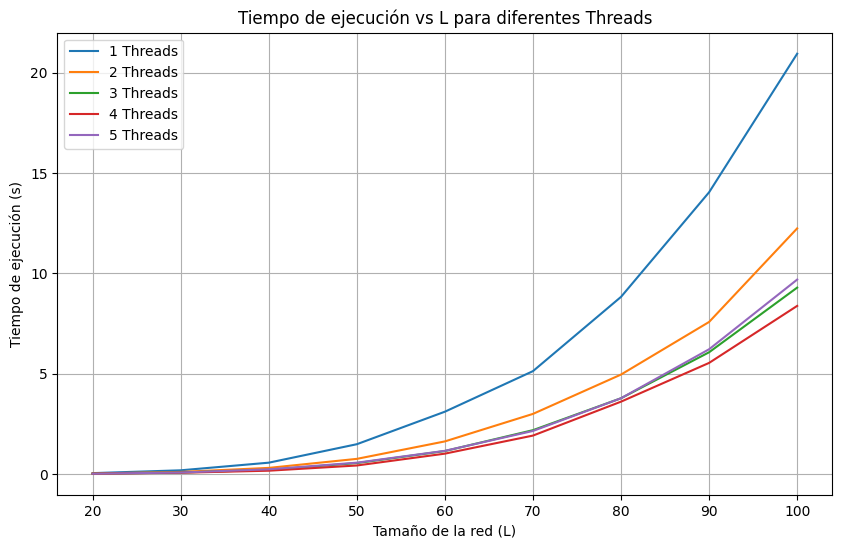

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer resultados
data = pd.read_csv("estudio_optimizacion.txt", sep="\t")

# Graficar tiempo vs L para cada número de threads
plt.figure(figsize=(10, 6))
for threads in data["Threads"].unique():
    subset = data[data["Threads"] == threads]
    plt.plot(subset["L"], subset["Tiempo (s)"], label=f"{threads} Threads")

plt.xlabel("Tamaño de la red (L)")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Tiempo de ejecución vs L para diferentes Threads")
plt.legend()
plt.grid()
plt.show()
